In [26]:
from pylab import *
%matplotlib inline

# Ecuacion diferencial a resolver 
$$
\dddot{y} + \ddot{y}^2 - 3\dot{y}^3 + cos^2(y) = exp(-t)sin(3t)
$$
con las condiciones iniciales:
$$
y(1)=1 \\ \\  \dot{y}(1)=2 \\ \\  \ddot{y}(1)=1 
$$

Para obtener dos ecuaciones diferenciales de orden 1, se hará el siguiente cambio de variable: 

$$
y(t)=x(t)\\ \\dy(t)=\dot{x}(t) \\ \\ddy(t)=\ddot{y}(t) 
$$
Definimos las funciones: 
$$
f_1(t,y(t),dy(t)) = dy(t)\\ \\f_2(t,y(t),dy(t)) = ddy(t)\\ \\f_3(t,y(t),dy(t)) = exp(-t)sin(3t) -ddy(t)^2 + 3dy(t)^3 - cos^2(y(t))
$$

In [27]:
def f1(ddy,dy,y,t): 
    return dy
def f2(ddy,dy,y,t): 
    return ddy
def f3(ddy,dy,y,t): 
    return exp(-t)*sin(3*t) - ddy**2 + 3*(dy**3) - (cos(y))**2

In [28]:
def euler(funcion1,funcion2,funcion3,p_ini,t_final,h): 
    tiempos = arange(p_ini[0],t_final+h,h) 
    y = [0]*len(tiempos) 
    dy = [0]*len(tiempos) 
    ddy = [0]*len(tiempos) 
    y[0] = p_ini[1]  
    dy[0] = p_ini[2] 
    ddy[0] = p_ini[3]
    for i in range(len(tiempos)-1): 
        y[i+1]  =  y[i] + funcion1(ddy[i],dy[i],y[i],tiempos[i])*h 
        dy[i+1] = dy[i] + funcion2(ddy[i],dy[i],y[i],tiempos[i])*h 
        ddy[i+1]=ddy[i] + funcion3(ddy[i],dy[i],y[i],tiempos[i])*h 
    return tiempos,y,dy,ddy

In [29]:
def d_f1(ddy,dy,y,t): 
    return 0,1
def d_f2(ddy,dy,y,t): 
    return 0,1
def d_f3(ddy,dy,y,t): 
    return exp(-t)*(3*cos(3*t)-sin(3*t)),sin(2*y)

In [30]:
def segundo_orden1(ec_dif1,ec_dif2,ec_dif3,p_ini,t_final,ec_jac1,ec_jac2,ec_jac3,h): 
    tiempo=arange(p_ini[0],t_final+h,h) 
    y = zeros(len(tiempo))
    dy = zeros(len(tiempo))
    ddy = zeros(len(tiempo))
    y[0] = p_ini[1]  
    dy[0] = p_ini[2] 
    ddy[0] = p_ini[3] 
    for i in range(len(tiempo)-1): 
        y[i+1] = y[i] + h*ec_dif1(ddy[i],dy[i],y[i],tiempo[i]) 
        y[i+1] += 0.5*h*h*ec_jac1(ddy[i],dy[i],y[i],tiempo[i])[0]
        y[i+1] += 0.5*h*h*ec_jac1(ddy[i],dy[i],y[i],tiempo[i])[1]*ec_dif1(ddy[i],dy[i],y[i],tiempo[i])
        dy[i+1] = dy[i] + h*ec_dif2(ddy[i],dy[i],y[i],tiempo[i])  
        dy[i+1] += 0.5*h*h*ec_jac2(ddy[i],dy[i],y[i],tiempo[i])[0]
        dy[i+1] += 0.5*h*h*ec_jac2(ddy[i],dy[i],y[i],tiempo[i])[1]*ec_dif2(ddy[i],dy[i],y[i],tiempo[i])
        ddy[i+1] = ddy[i] + h*ec_dif3(ddy[i],dy[i],y[i],tiempo[i])  
        ddy[i+1] += 0.5*h*h*ec_jac3(ddy[i],dy[i],y[i],tiempo[i])[0]
        ddy[i+1] += 0.5*h*h*ec_jac3(ddy[i],dy[i],y[i],tiempo[i])[1]*ec_dif3(ddy[i],dy[i],y[i],tiempo[i])
    return tiempo,y,dy,ddy 

In [31]:
def rk2(ec_1,ec_2,ec_3,p_ini,t_final,h):
    tiempo=arange(p_ini[0],t_final+h,h) 
    y = zeros(len(tiempo)) 
    dy = zeros(len(tiempo)) 
    ddy = zeros(len(tiempo))
    y[0] = p_ini[1] 
    dy[0] = p_ini[2] 
    ddy[0] = p_ini[3]
    for i in xrange(len(tiempo)-1): 
        k1 = ec_1(ddy[i],dy[i],y[i],tiempo[i]) 
        k2 = h*ec_1(ddy[i]+k1*h*.5,dy[i]+k1*h*.5,y[i]+k1*h*.5,tiempo[i]+h*.5)
        y[i+1] = y[i] + k2
        dk1 = ec_2(ddy[i],dy[i],y[i],tiempo[i]) 
        dk2 = h*ec_2(ddy[i]+dk1*h*.5,dy[i]+dk1*h*.5,y[i]+dk1*h*.5,tiempo[i]+h*.5)
        dy[i+1] = dy[i] + dk2
        ddk1 = ec_3(ddy[i],dy[i],y[i],tiempo[i]) 
        ddk2 = h*ec_3(ddy[i]+ddk1*h*.5,dy[i]+ddk1*h*.5,y[i]+ddk1*h*.5,tiempo[i]+h*.5)
        ddy[i+1] = ddy[i] + ddk2
    return tiempo,y,dy,ddy 

In [ ]:
def rk4(ec_1,ec_2,ec_3,p_ini,t_final,h):
    tiempo=arange(p_ini[0],t_final+h,h) 
    y = zeros(len(tiempo)) 
    dy = zeros(len(tiempo))  
    ddy = zeros(len(tiempo)) 
    y[0] = p_ini[1] 
    dy[0] = p_ini[2] 
    ddy[0] = p_ini[3] 
    for i in xrange(len(tiempo)-1): 
        k1 = ec_1(ddy[i],dy[i],y[i],tiempo[i])  
        k2 = ec_1(ddy[i]+k1*h*.5,dy[i]+k1*h*.5,y[i]+k1*h*.5,tiempo[i]+h*.5)
        k3 = ec_1(ddy[i]+k2*h*.5,dy[i]+k2*h*.5,y[i]+k2*h*.5,tiempo[i]+h*.5)
        k4 = ec_1(ddy[i]+k3*h,dy[i]+k3*h,y[i]+k3*h,tiempo[i]+h)
        y[i+1] = y[i] + h*(k1+2*k2+2*k3+k4)/6
        dk1 = ec_2(ddy[i],dy[i],y[i],tiempo[i]) 
        dk2 = ec_2(ddy[i]+dk1*h*.5,dy[i]+dk1*h*.5,y[i]+dk1*h*.5,tiempo[i]+h*.5)
        dk3 = ec_2(ddy[i]+dk2*h*.5,dy[i]+dk2*h*.5,y[i]+dk2*h*.5,tiempo[i]+h*.5)
        dk4 = ec_2(ddy[i]+k3*h,dy[i]+dk3*h,y[i]+dk3*h,tiempo[i]+h)
        dy[i+1] = dy[i] + h*(dk1+2*dk2+2*dk3+dk4)/6
        ddk1 = ec_3(ddy[i],dy[i],y[i],tiempo[i]) 
        ddk2 = ec_3(ddy[i]+ddk1*h*.5,dy[i]+ddk1*h*.5,y[i]+ddk1*h*.5,tiempo[i]+h*.5)
        ddk3 = ec_3(ddy[i]+ddk2*h*.5,dy[i]+ddk2*h*.5,y[i]+ddk2*h*.5,tiempo[i]+h*.5)
        ddk4 = ec_3(ddy[i]+ddk3*h,dy[i]+ddk3*h,y[i]+ddk3*h,tiempo[i]+h)
        ddy[i+1] = ddy[i] + h*(ddk1+2*ddk2+2*ddk3+ddk4)/6
    return tiempo,y,dy,ddy 

# Con un paso de integración de h=0.1

/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in cos


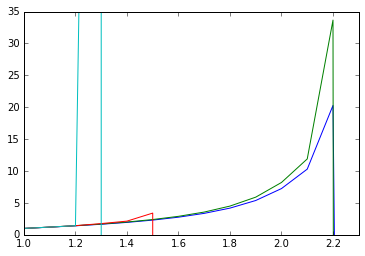

In [52]:
sol = euler(f1,f2,f3,[1,1,2,1],2.3,.1) 
y_seg = segundo_orden1(f1,f2,f3,[1,1,2,1],2.3,d_f1,d_f2,d_f3,0.1) 
sol1 = rk2(f1,f2,f3,[1,1,2,1],2.3,.1)
sol2 = rk4(f1,f2,f3,[1,1,2,1],2.3,.1) 
xlim([1,2.3]),ylim([0,35])
plot(sol[0],sol[1],y_seg[0],y_seg[1],sol1[0],sol1[1],sol2[0],sol2[1])
show()

Metodo de Euler = azul 
$$
$$
Metodo de Taylor de segundo orden = verde 
$$
$$
Metodo de Runge Kutta segundo orden = rojo
$$
$$
Metodo de Runge Kutta cuarto orden = azul cielo

En la graficada vemos en el intervalo t ∈ [1, 2.3] hay una discontinuaidad y las soluciones obtenidas para los metodos de Euler y Taylor de segundo orden, son asintoticas a la discontinuidad en t = 2.2. Las funciones obtenidas por los metodos de Runge y Kutta son asitoticas a otros puntos anterioes a t=2.2, y parecen ser poco exactas


# Con un paso de integración de h=0.01

/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in cos


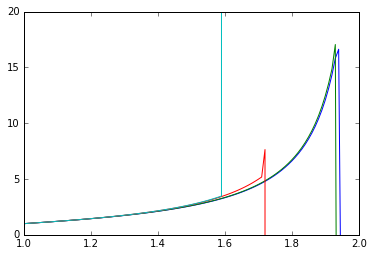

In [57]:
sol = euler(f1,f2,f3,[1,1,2,1],2.,.01) 
y_seg = segundo_orden1(f1,f2,f3,[1,1,2,1],2.,d_f1,d_f2,d_f3,0.01) 
sol1 = rk2(f1,f2,f3,[1,1,2,1],2.,.01)
sol2 = rk4(f1,f2,f3,[1,1,2,1],2.,.01) 
xlim([1,2.]),ylim([0,20])
plot(sol[0],sol[1],y_seg[0],y_seg[1],sol1[0],sol1[1],sol2[0],sol2[1])
show()

Metodo de Euler = azul 
$$
$$
Metodo de Taylor de segundo orden = verde 
$$
$$
Metodo de Runge Kutta segundo orden = rojo
$$
$$
Metodo de Runge Kutta cuarto orden = azul cielo

En la graficada vemos en el intervalo t ∈ [1, 2] hay una discontinuaidad y las soluciones obtenidas para los metodos de Euler y Taylor de segundo orden, son asintoticas a la discontinuidad entre t = 1.9 y t = 2 . Las funciones obtenidas por los metodos de Runge y Kutta son asitoticas a otros puntos anterioes a t = 1.8, y parecen ser poco exactas

# Con un paso de integración de h=0.001

/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in cos
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sin


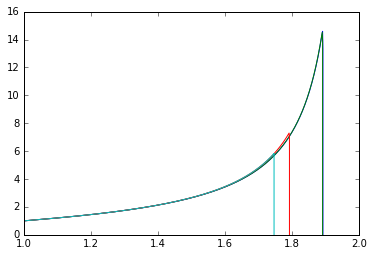

In [56]:
sol = euler(f1,f2,f3,[1,1,2,1],2.,.001) 
y_seg = segundo_orden1(f1,f2,f3,[1,1,2,1],2.,d_f1,d_f2,d_f3,0.001) 
sol1 = rk2(f1,f2,f3,[1,1,2,1],2.,.001)
sol2 = rk4(f1,f2,f3,[1,1,2,1],2.,.001) 
xlim([1,2.]),ylim([0,16])
plot(sol[0],sol[1],y_seg[0],y_seg[1],sol1[0],sol1[1],sol2[0],sol2[1])
show()

Metodo de Euler = azul 
$$
$$
Metodo de Taylor de segundo orden = verde 
$$
$$
Metodo de Runge Kutta segundo orden = rojo
$$
$$
Metodo de Runge Kutta cuarto orden = azul cielo

En la graficada vemos en el intervalo t ∈ [1, 2] hay una discontinuaidad y las soluciones obtenidas para los metodos de Euler y Taylor de segundo orden, son asintoticas a la discontinuidad entre t = 1.9. Las funciones obtenidas por los metodos de Runge y Kutta son asitoticas a otros puntos cercanos a t = 1.8, y parecen ser bastante mas parecidas a las soluciones de Euler y Taylor

# Con un paso de integración de h=0.0001

/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in cos
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars


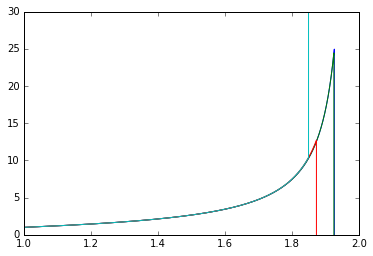

In [55]:
sol = euler(f1,f2,f3,[1,1,2,1],2.,.0001) 
y_seg = segundo_orden1(f1,f2,f3,[1,1,2,1],2.,d_f1,d_f2,d_f3,0.0001) 
sol1 = rk2(f1,f2,f3,[1,1,2,1],2.,.0001)
sol2 = rk4(f1,f2,f3,[1,1,2,1],2.,.0001) 
xlim([1,2.]),ylim([0,30])
plot(sol[0],sol[1],y_seg[0],y_seg[1],sol1[0],sol1[1],sol2[0],sol2[1])
show()

Metodo de Euler = azul 
$$
$$
Metodo de Taylor de segundo orden = verde 
$$
$$
Metodo de Runge Kutta segundo orden = rojo
$$
$$
Metodo de Runge Kutta cuarto orden = azul cielo

En la graficada vemos en el intervalo t ∈ [1, 2] hay una discontinuaidad y las soluciones obtenidas con los metodos de Euler, Taylor de segundo orden y Runge y Kutta , son asintoticas a la discontinuidad entre t = 1.8 y t = 2. Las funciones obtenidas por los metodos de Runge y Kutta son cada vez mas parecidas a las soluciones de Euler y Taylor.

# Con un paso de integración de h=0.00001

/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in cos
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars


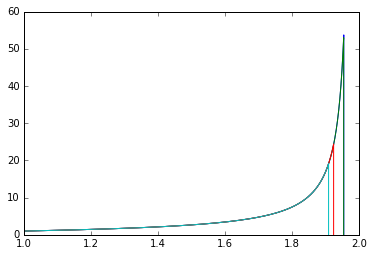

In [60]:
sol = euler(f1,f2,f3,[1,1,2,1],2.3,.00001) 
y_seg = segundo_orden1(f1,f2,f3,[1,1,2,1],2.3,d_f1,d_f2,d_f3,0.00001) 
sol1 = rk2(f1,f2,f3,[1,1,2,1],2.3,.00001)
sol2 = rk4(f1,f2,f3,[1,1,2,1],2.3,.00001) 
xlim([1,2.]),ylim([0,60])
plot(sol[0],sol[1],y_seg[0],y_seg[1],sol1[0],sol1[1],sol2[0],sol2[1])
show()

Metodo de Euler = azul 
$$
$$
Metodo de Taylor de segundo orden = verde 
$$
$$
Metodo de Runge Kutta segundo orden = rojo
$$
$$
Metodo de Runge Kutta cuarto orden = azul cielo

En la graficada vemos en el intervalo t ∈ [1, 2] hay una discontinuaidad y las soluciones obtenidas con los metodos de Euler, Taylor de segundo orden y Runge y Kutta , son asintoticas a la discontinuidad localizada entre t = 1.9 y t = 2. Las funciones obtenidas por los metodos de Runge y Kutta son cada vez mas parecidas a las soluciones de Euler y Taylor.

# Con un paso de integración de h=0.000001

/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in cos
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars


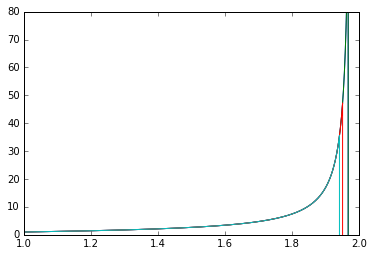

In [62]:
sol = euler(f1,f2,f3,[1,1,2,1],2.,.000001) 
y_seg = segundo_orden1(f1,f2,f3,[1,1,2,1],2.,d_f1,d_f2,d_f3,0.000001) 
sol1 = rk2(f1,f2,f3,[1,1,2,1],2.,.000001)
sol2 = rk4(f1,f2,f3,[1,1,2,1],2.,.000001) 
xlim([1,2.]),ylim([0,80])
plot(sol[0],sol[1],y_seg[0],y_seg[1],sol1[0],sol1[1],sol2[0],sol2[1])
show()

Metodo de Euler = azul 
$$
$$
Metodo de Taylor de segundo orden = verde 
$$
$$
Metodo de Runge Kutta segundo orden = rojo
$$
$$
Metodo de Runge Kutta cuarto orden = azul cielo

En la graficada vemos en el intervalo t ∈ [1, 2] hay una discontinuaidad y las soluciones obtenidas con los metodos de Euler, Taylor de segundo orden y Runge y Kutta , son asintoticas a la discontinuidad localizada entre t = 1.9 y t = 2. Las funciones obtenidas por los metodos de Runge y Kutta son practicamente identicas a las soluciones de Euler y Taylor.

# Con un paso de integración de h=0.0000001

/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in cos
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/hugosl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sin


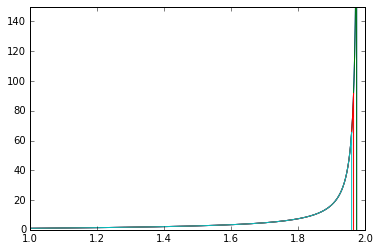

In [63]:
sol = euler(f1,f2,f3,[1,1,2,1],2.,.0000001) 
y_seg = segundo_orden1(f1,f2,f3,[1,1,2,1],2.,d_f1,d_f2,d_f3,0.0000001) 
sol1 = rk2(f1,f2,f3,[1,1,2,1],2.,.0000001)
sol2 = rk4(f1,f2,f3,[1,1,2,1],2.,.0000001) 
xlim([1,2.]),ylim([0,150])
plot(sol[0],sol[1],y_seg[0],y_seg[1],sol1[0],sol1[1],sol2[0],sol2[1])
show()

Metodo de Euler = azul 
$$
$$
Metodo de Taylor de segundo orden = verde 
$$
$$
Metodo de Runge Kutta segundo orden = rojo
$$
$$
Metodo de Runge Kutta cuarto orden = azul cielo

En la graficada vemos en el intervalo t ∈ [1, 2] hay una discontinuaidad y las soluciones obtenidas con los metodos de Euler, Taylor de segundo orden y Runge y Kutta , son asintoticas a la discontinuidad localizada entre t = 1.9 y t = 2. 

# El mejor paso de intrgracion es h=0.0000001, y es con el cual las soluciones obtenidas mediante de todos los metodos de integracion se parecen mas. Las soluciones son asintoticas a un punto entre t = 1.9 y t = 2, donde las soluciones obtenidas mediante el metodo de Euler y Taylor parecen converger mas rapidamente, aunque se supone que los metodos de Runge Kutta son mas exactos. 